In [23]:
from transmon import *

nmon = Nmon()
nmon.hamiltonian_calc(flux=0)

In [24]:
print("EC", nmon.EC)
print("ECM", nmon.ECM)
print("C from EC", nmon.C_from_EC) # factor of 1/(N*M)**2
print("total C (CN + CM)", nmon.C_total)

print('total L', nmon.L_total)
print('Expected freq', 1/ np.sqrt(nmon.L_total*nmon.C_total)/1e9)

print("EJM", nmon.EJM)
print("ECJM", nmon.ECJM)

EC 0.019317838816782375
ECM 1
C from EC 9.999999999999998e-13
total C (CN + CM) 1e-12
total L 3.266628754745457e-08
Expected freq 5.532865458179155
EJM 10
ECJM 1


In [25]:
transmon = scq.Transmon(EJ=nmon.EJM*2,
                              EC=nmon.EC,
                              ng=0.0,
                              ncut=31)
tmon_evals = transmon.eigenvals()
tmon_evals, tmon_evals[1] - tmon_evals[0]

(array([-19.12581517, -17.38726912, -15.66854368, -13.9699963 ,
        -12.29200667, -10.63497917]),
 1.7385460562191142)

In [26]:
s = nmon.nmon_circ.sym_hamiltonian(float_round=4)

<IPython.core.display.Latex object>

In [27]:
system_hierarchy = [[1]]
scq.truncation_template(system_hierarchy)

[6]

In [6]:
# nmon.nmon_circ.cutoff_names

In [28]:
nmon.nmon_circ.cutoff_n_1 = 31
nmon.nmon_circ.configure(system_hierarchy=system_hierarchy, subsystem_trunc_dims=[6])
nmon.nmon_circ.sym_hamiltonian(subsystem_index=0, float_round=4, return_expr=True)  # show Hamiltonian for subsystem 0

(1.3333*n1**2 + 1.3333*n_g1**2 + 2.6667*n1*n_g1) + (-10.0*cos(θ1) - 10.0*cos((2πΦ_{1}) - θ1))

In [29]:
nmon.nmon_circ.Φ1 = 0.0
nmon.nmon_circ.ng1 = 0.0
nmon.nmon_circ.hamiltonian()#.toarray()

array([[-16.43389677+0.j,   0.        +0.j,   0.        +0.j,
          0.        +0.j,   0.        +0.j,   0.        +0.j],
       [  0.        +0.j,  -9.48167867+0.j,   0.        +0.j,
          0.        +0.j,   0.        +0.j,   0.        +0.j],
       [  0.        +0.j,   0.        +0.j,  -2.90670781+0.j,
          0.        +0.j,   0.        +0.j,   0.        +0.j],
       [  0.        +0.j,   0.        +0.j,   0.        +0.j,
          3.25062296+0.j,   0.        +0.j,   0.        +0.j],
       [  0.        +0.j,   0.        +0.j,   0.        +0.j,
          0.        +0.j,   8.91283591+0.j,   0.        +0.j],
       [  0.        +0.j,   0.        +0.j,   0.        +0.j,
          0.        +0.j,   0.        +0.j,  14.12210471+0.j]])

In [30]:
evals = nmon.nmon_circ.subsystems[0].eigenvals()
evals, evals[1] - evals[0]

(array([-16.43389677,  -9.48167867,  -2.90670781,   3.25062296,
          8.91283591,  14.12210471]),
 6.952218097897415)

In [31]:
nmon.nmon_circ.variable_transformation()

<IPython.core.display.Latex object>

In [32]:
nmon.nmon_circ.potential_symbolic

-10.0*cos(θ1) - 10.0*cos(Φ1 - θ1)

In [33]:
import numpy as np
Matr = nmon.nmon_circ.transformation_matrix
Matr_inv = np.linalg.inv(Matr)

main_node = 1
M_nodes = [] # should be sorted
N_nodes = [] # should be sorted

solution_coefs = np.zeros(nmon.N + nmon.M) # coefs for phi_i for i from 0 to M+N-1

solution_coefs[1] = nmon.N*nmon.M

for position, node_num in enumerate(M_nodes):
    solution_coefs[node_num] = nmon.N * (position + 1)

for position, node_num in enumerate(N_nodes):
    solution_coefs[node_num] = nmon.M * (position + 1)

theta_coefs = Matr_inv@solution_coefs[1:] # theta coefs
theta_coefs # theta = theta_coef * phi

array([1.])

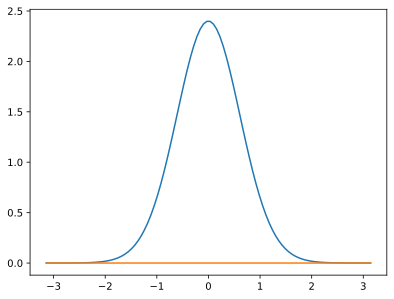

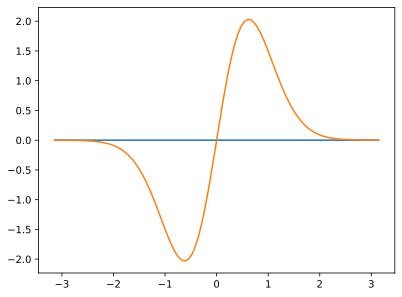

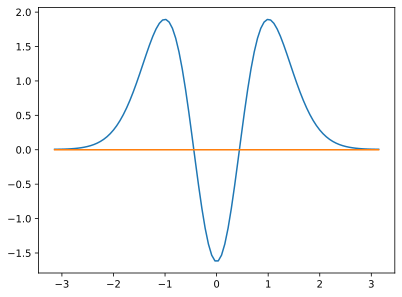

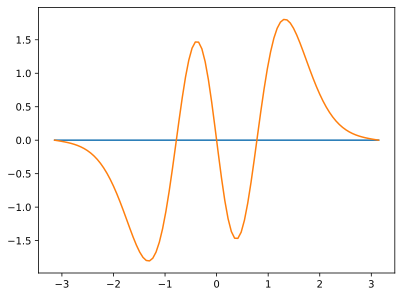

[1.20192215e-04+8.47387944e-33j 1.26866443e-04+7.14315771e-18j
 1.47614099e-04+3.26087281e-18j 1.84680292e-04+6.98975433e-18j
 2.42045992e-04+2.95486858e-17j 3.25804753e-04+9.46396925e-18j
 4.44726679e-04+2.81389131e-17j 6.11047054e-04+1.65934409e-17j
 8.41528727e-04+2.07599515e-17j 1.15885927e-03+3.21995163e-17j
 1.59345542e-03+2.32002749e-17j 2.18575752e-03+3.80364105e-17j
 2.98910382e-03+1.08100292e-17j 4.07327688e-03+2.58934803e-17j
 5.52880827e-03+3.00182335e-17j 7.47211047e-03+6.58365383e-18j
 1.00514721e-02+7.18541729e-18j 1.34538990e-02+1.51746744e-17j
 1.79127053e-02+2.24662238e-18j 2.37156536e-02-2.60948292e-17j
 3.12133052e-02+1.78891718e-18j 4.08270754e-02-1.40354942e-17j
 5.30562998e-02-2.82914799e-17j 6.84834103e-02-9.13482268e-18j
 8.77761212e-02-2.08724843e-17j 1.11685350e-01-3.55440840e-17j
 1.41037483e-01-1.58898143e-17j 1.76719578e-01-3.22829734e-17j
 2.19656209e-01+2.72701584e-18j 2.70776938e-01-1.94307597e-17j
 3.30973906e-01+1.56075729e-17j 4.01049690e-01-5.143231

In [61]:

left_phi = -np.pi
right_phi = np.pi
N_phi = 100

phi_list = np.linspace(left_phi, right_phi, N_phi)

theta_grids = [scq.core.discretization.Grid1d(left_phi*theta_coefs[i], right_phi*theta_coefs[i], N_phi) for i in range(nmon.N + nmon.M - 1)]

wavefunctions = []
for i in range(4): #range(len(evals)):
    full_wf = nmon.nmon_circ.subsystems[0].generate_wf_plot_data(which=i, var_indices=(1,), \
                                                                 grids_dict={1 : theta_grids[0]}, mode='real')
    full_wf = np.einsum('i->i', full_wf)

    imag_full_wf = nmon.nmon_circ.subsystems[0].generate_wf_plot_data(which=i, var_indices=(1,), \
                                                                 grids_dict={1 : theta_grids[0]}, mode='imag')
    imag_full_wf = np.einsum('i->i', imag_full_wf)
    wavefunctions.append(full_wf+ 1j*imag_full_wf)
    plt.plot(phi_list, full_wf)
    plt.plot(phi_list, imag_full_wf)
    plt.show()
print(wavefunctions[0].conj())

100%|██████████| 100/100 [00:00<00:00, 1159.51it/s]


Text(0.5, 1.0, 'EC=0.019317838816782375')

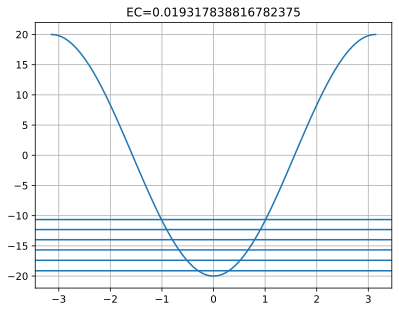

In [25]:
from tqdm import tqdm

potential_list = np.zeros_like(phi_list)
for i, phi in enumerate(tqdm(phi_list)):
    potential_list[i] = nmon.nmon_circ.potential_energy(θ1=phi*theta_coefs[0])

shifted_evals = evals #+ 2*np.abs(np.min(evals))
shifted_potential_list = potential_list# - min(potential_list)

plt.plot(phi_list, shifted_potential_list)

for eval in shifted_evals:
    plt.axhline(eval)

plt.grid(which='both')
plt.title("EC={}".format(nmon.EC))
# plt.ylim(-12, 12)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

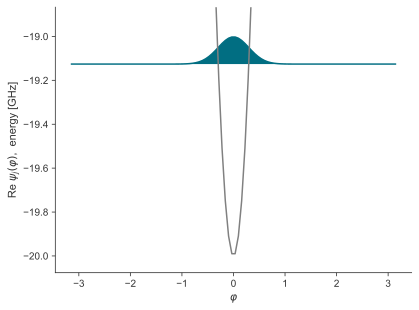

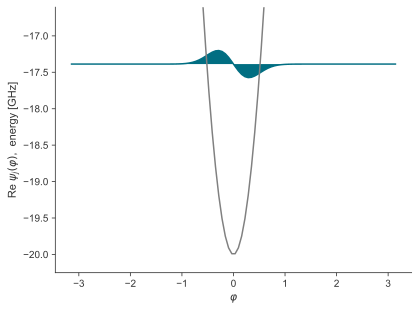

In [23]:
transmon.plot_phi_wavefunction(transmon.eigensys(), which=0, phi_grid=scq.core.discretization.Grid1d(left_phi, right_phi, N_phi), mode='real')
transmon.plot_phi_wavefunction(transmon.eigensys(), which=1, phi_grid=scq.core.discretization.Grid1d(left_phi, right_phi, N_phi), mode='real')

### Matrix elements

In [39]:
# How to define ng?
import numpy as np
from scipy.linalg import eigh

# Example Hamiltonian matrix H and its n_g derivative dH_ng
# These should be defined or calculated from your system's parameters
nmon.nmon_circ.Φ1 = 0
nmon.nmon_circ.ng1 = 0
H = nmon.nmon_circ.hamiltonian()
dH_ng = dH_dng_matrix

# Diagonalize H to find its eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(H)

# Energy difference between the first two levels
omega_01 = eigenvalues[1] - eigenvalues[0]

# Compute the matrix element
m, n = 0, 1  # States |0> and |1>
matrix_element = np.abs(eigenvectors[m].conj() @ dH_ng @ eigenvectors[n])

# Normalize by omega_01
normalized_matrix_element = matrix_element / omega_01

print("Normalized matrix element:", normalized_matrix_element)


Normalized matrix element: 0.0


In [38]:
eigenvectors

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [32]:
import sympy as sp

# Define symbols
n_g = sp.symbols('n_g1')

H_sym = nmon.nmon_circ.sym_hamiltonian(subsystem_index=0, float_round=4, return_expr=True)

# Differentiate H with respect to n_g
dH_dng = sp.diff(H_sym, n_g)

print(H_sym)
print(dH_dng)

dH_dng_num = dH_dng.subs({n_g: 0.0})

print(sp.simplify(dH_dng_num))

import numpy as np

# Define the size of the matrix - the cutoff
N = 6  # Assuming we are working with 10 states

# Create the n1 matrix
n1_matrix = np.diag(range(N))

# Now calculate the matrix for dH/dng_num (which now only depends on n1)
dH_dng_matrix = 0.154 * n1_matrix  # Since n_g1 is set to 0 and doesn't contribute

# Print out the matrix
print("Matrix representation of dH/dng after setting n_g1 to 0:\n", dH_dng_matrix)



(-10.0*cos(θ1) - 10.0*cos((2πΦ_{1}) - θ1)) + (0.077*n1**2 + 0.154*n1*n_g1 + 0.077*n_g1**2)
0.154*n1 + 0.154*n_g1
0.154*n1
Matrix representation of dH/dng after setting n_g1 to 0:
 [[0.    0.    0.    0.    0.    0.   ]
 [0.    0.154 0.    0.    0.    0.   ]
 [0.    0.    0.308 0.    0.    0.   ]
 [0.    0.    0.    0.462 0.    0.   ]
 [0.    0.    0.    0.    0.616 0.   ]
 [0.    0.    0.    0.    0.    0.77 ]]


In [49]:
import numpy as np

def hamiltonian(n_g):
    nmon.nmon_circ.Φ1 = 0
    nmon.nmon_circ.ng1 = n_g
    H = nmon.nmon_circ.hamiltonian()
    nmon.nmon_circ.ng1 = 0
    return H

# Initial n_g and a small delta for n_g
n_g = 0.0
delta = 1e-5

# Calculate H at n_g and n_g + delta
H = hamiltonian(n_g)
H_delta = hamiltonian(n_g + delta)

# Numerical derivative of H with respect to n_g
dH_ng = (H_delta - H) / delta

dH_ng


array([[-1.42108547e-09+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  3.55271368e-10+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         5.32907052e-10+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  7.10542736e-10+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j]])

In [21]:
### WORKS!!! : phase basis

import numpy as np

# Constants for the system
E_C = nmon.EC  # Example value for Charging Energy
E_J = nmon.EJM*2  # Example value for Josephson Energy
n_g = -0.1  # Example offset charge value

# Number of discretization points for phi
N_phi = 200

# Discretize the phase interval [0, 2*pi]
phi = np.linspace(0, 2*np.pi, N_phi, endpoint=False)

# Step size for phi
h_phi = 2*np.pi / N_phi

# Derivative operator using central differences for n
d_dphi = -1j * (np.diag(np.ones(N_phi-1), 1) - np.diag(np.ones(N_phi-1), -1)) / (2*h_phi)
d_dphi[0, -1] = -1j / (2*h_phi)  # Periodic boundary condition
d_dphi[-1, 0] = 1j / (2*h_phi)

# Cosine matrix for cos(phi)
cos_phi = np.diag(np.cos(phi))

# Hamiltonian construction
H = 4 * E_C * (d_dphi - n_g * np.eye(N_phi)) @ (d_dphi - n_g * np.eye(N_phi)) - E_J * cos_phi

print(H[0, 0], H[0, 1], H[0, 2], H[0, 3])
# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = np.linalg.eigh(H)

print(eigenvalues)
print(len(eigenvectors))

# # Transform n into the eigenbasis
# n_transformed = eigenvectors.conj().T @ d_dphi @ eigenvectors

# # Calculate n^2 in the eigenbasis
# n_squared_transformed = n_transformed @ n_transformed

# # Calculate fluctuations
# fluctuations_matrix = n_squared_transformed - np.outer(np.diag(n_transformed), np.diag(n_transformed))

# fluctuations_matrix

(19.146898600118433+0j) -0.24596236300347246j (-19.57306294328288+0j) 0j
[-19.12824867 -19.12824867 -17.39927301 -17.39927301 -15.69928889
 -15.69928889 -14.02817752 -14.02817752 -12.38583245 -12.38583245
 -10.77216075 -10.77216075  -9.18708442  -9.18708442  -7.63054201
  -7.63054201  -6.10249048  -6.10249048  -4.60290741  -4.60290741
  -3.1317936   -3.1317936   -1.6891762   -1.6891762   -0.27511237
  -0.27511237   1.11030618   1.11030618   2.46694776   2.46694776
   3.7946339    3.7946339    5.09313094   5.09313094   6.36213939
   6.36213939   7.60128019   7.60128019   8.81007689   8.81007689
   9.98793174   9.98793174  11.13409307  11.13409307  12.24760988
  12.24760988  13.32726212  13.32726212  14.37147853  14.37147853
  15.37804903  15.37804903  16.34455429  16.34455429  17.26394816
  17.26394816  18.141928    18.141928    18.91248757  18.91248757
  19.73591159  19.73591159  20.17049198  20.17049198  21.20572422
  21.20572422  21.59032152  21.59032152  22.88719234  22.88719234
  2

In [50]:
### WORKS !!! : charge basis

import numpy as np

# Constants for the system (same as before)
E_C = nmon.EC  # Example value for Charging Energy
E_J = nmon.EJM*2  # Example value for Josephson Energy
n_g = -0.0  # Example offset charge value

# Number of charge states (charge cutoff)
n_max = 10  # The charge number cutoff, choose a sufficiently large number to capture physics

# Create the charge basis states: from -n_max to n_max
charge_states = np.arange(-n_max, n_max+1)

# Diagonal matrix for (n - n_g)
n_operator = np.diag(charge_states - n_g)

# Construct the cos(phi) matrix in the charge basis
# This is the matrix form of cos(phi) in the charge basis, it couples adjacent charge states
cos_phi = np.zeros((2*n_max+1, 2*n_max+1))
for n in range(2*n_max):
    cos_phi[n, n+1] = cos_phi[n+1, n] = 0.5  # This is the form of the coupling in cos(phi)

# Now, construct the Hamiltonian in the charge basis
H_charge = 4 * E_C * n_operator @ n_operator - E_J * cos_phi

print(H_charge[0, 0], H_charge[0, 1], H_charge[0, 2])

# Diagonalize the Hamiltonian
eigenvalues_charge, eigenvectors_charge = np.linalg.eigh(H_charge)

print("Eigenvalues (Charge Basis):", eigenvalues_charge)

# # Transform n into the eigenbasis
# n_transformed_charge = eigenvectors_charge.conj().T @ n_operator @ eigenvectors_charge

# # Calculate n^2 in the eigenbasis
# n_squared_transformed_charge = n_transformed_charge @ n_transformed_charge

# # Calculate fluctuations in the charge basis
# fluctuations_matrix_charge = n_squared_transformed_charge - np.outer(np.diag(n_transformed_charge), np.diag(n_transformed_charge))

# fluctuations_matrix_charge


7.727135526712949 -10.0 0.0
Eigenvalues (Charge Basis): [-19.12564692 -17.38441225 -15.64677998 -13.87105876 -11.98475871
  -9.91673801  -7.63420995  -5.14799853  -2.4963661    0.26945158
   3.09258087   5.91376198   8.67297384  11.31034036  13.76634839
  15.98112093  17.87359068  19.52834984  20.15872636  23.06665463
  23.07301331]


In [18]:
### with scq : phase basis


import numpy as np
import scqubits as scq

# Initialize a Transmon (example)
transmon = scq.Transmon(EJ=30.0, EC=0.5, ng=0.0, ncut=20)

# Obtain Hamiltonian matrix in the computational basis (likely charge basis)
H_charge = transmon.hamiltonian()

# Assume we need to convert this to the phase basis
# We would need the size of the matrix to match the number of discretized phase points
N_phi = H_charge.shape[0]
phi = np.linspace(0, 2*np.pi, N_phi, endpoint=False)
dphi = 2*np.pi / N_phi

# Approximate the derivative operator for n as a matrix
d_n = -1j * (np.diag(np.ones(N_phi-1), -1) - np.diag(np.ones(N_phi-1), 1)) / (2*dphi)
d_n[0, -1] = 1j / (2*dphi)  # Assuming periodic boundary conditions
d_n[-1, 0] = -1j / (2*dphi)

# Construct phase representation Hamiltonian
# This is highly conceptual and would require actual system parameters to define properly
H_phase = transmon.EC * d_n @ d_n + transmon.EJ * np.diag(np.cos(phi))

# Check if transformation is needed (not directly applicable but gives an idea)
H_phase

array([[40.64505686+0.j,  0.        +0.j, -5.32252843+0.j, ...,
         0.        +0.j,  5.32252843+0.j,  0.        +0.j],
       [ 0.        +0.j, 40.29346957+0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  5.32252843+0.j],
       [-5.32252843+0.j,  0.        +0.j, 39.24694862+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       ...,
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
        37.53002357+0.j,  0.        +0.j, -5.32252843+0.j],
       [ 5.32252843+0.j,  0.        +0.j,  0.        +0.j, ...,
         0.        +0.j, 39.24694862+0.j,  0.        +0.j],
       [ 0.        +0.j,  5.32252843+0.j,  0.        +0.j, ...,
        -5.32252843+0.j,  0.        +0.j, 40.29346957+0.j]])

In [78]:
# How it all looks in case of n1, n2???

[[ 456.64511421+0.j           0.        -6.3018927j
  -253.30295911+0.j        ...    0.        +0.j
   253.30295911+0.j           0.        -6.3018927j]
 [   0.        +6.3018927j  456.74377779+0.j
     0.        -6.3018927j ...    0.        +0.j
     0.        +0.j         253.30295911+0.j       ]
 [-253.30295911+0.j           0.        +6.3018927j
   457.03937915+0.j        ...    0.        +0.j
     0.        +0.j           0.        +0.j       ]
 ...
 [   0.        +0.j           0.        +0.j
     0.        +0.j        ...  457.53075168+0.j
     0.        -6.3018927j -253.30295911+0.j       ]
 [ 253.30295911+0.j           0.        +0.j
     0.        +0.j        ...    0.        +6.3018927j
   457.03937915+0.j           0.        -6.3018927j]
 [   0.        +6.3018927j  253.30295911+0.j
     0.        +0.j        ... -253.30295911+0.j
     0.        +6.3018927j  456.74377779+0.j       ]]


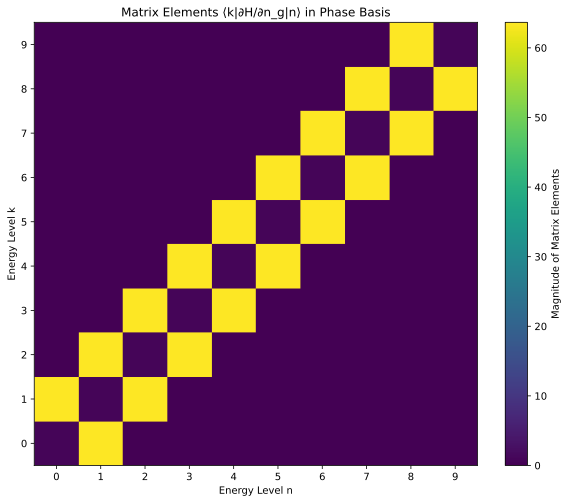

In [20]:
### WORKS!!! : phase basis

import numpy as np
import matplotlib.pyplot as plt

# Constants for the system
E_C = 1.0  # Charging Energy
E_J = 50  # Josephson Energy
n_g0 = -0.1  # Base offset charge value

# Number of discretization points for phi
N_phi = 100
N_phi_trunc = 10

# Discretize the phase interval [0, 2*pi]
phi = np.linspace(0, 2*np.pi, N_phi, endpoint=False)

# Step size for phi
h_phi = 2*np.pi / N_phi

# Range and discretization for n_g
N_ng = 100
n_g_values = np.linspace(n_g0 - 0.1, n_g0 + 0.1, N_ng)

# Array to hold Hamiltonian matrices
H_matrices = np.zeros((N_phi, N_phi, len(n_g_values)), dtype=complex)

# Derivative operator using central differences for n
d_dphi = -1j * (np.diag(np.ones(N_phi-1), 1) - np.diag(np.ones(N_phi-1), -1)) / (2*h_phi)
d_dphi[0, -1] = -1j / (2*h_phi)  # Periodic boundary condition
d_dphi[-1, 0] = 1j / (2*h_phi)

# Cosine matrix for cos(phi)
cos_phi = np.diag(np.cos(phi))

# Fill in the Hamiltonian matrix for each value of n_g
for i, n_g in enumerate(n_g_values):
    H_matrices[:, :, i] = 4 * E_C * (d_dphi - n_g * np.eye(N_phi)) @ (d_dphi - n_g * np.eye(N_phi)) - E_J * cos_phi

print(H_matrices[:, :, N_ng//2])

# Numerically differentiate the Hamiltonian with respect to n_g
dH_dng = np.gradient(H_matrices, n_g_values, axis=2)

# Select the derivative at the central n_g value
dH_dng_at_ng0 = dH_dng[:N_phi_trunc, :N_phi_trunc, N_ng//2]  # assuming n_g0 corresponds to the middle index

matrix_elements = dH_dng_at_ng0

# # Diagonalize the Hamiltonian at n_g0
# eigenvalues, eigenvectors = np.linalg.eigh(H_matrices[:, :, 50])

# # Calculate matrix elements ⟨k|∂H/∂n_g|n⟩ in the eigenbasis
# matrix_elements = eigenvectors.conj().T @ dH_dng_at_ng0 @ eigenvectors

# Plotting the matrix elements
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(matrix_elements), cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude of Matrix Elements')
plt.title('Matrix Elements ⟨k|∂H/∂n_g|n⟩ in Phase Basis')
plt.xlabel('Energy Level n')
plt.ylabel('Energy Level k')
plt.xticks(range(N_phi_trunc), labels=[f'{i}' for i in range(N_phi_trunc)])
plt.yticks(range(N_phi_trunc), labels=[f'{i}' for i in range(N_phi_trunc)])
plt.show()


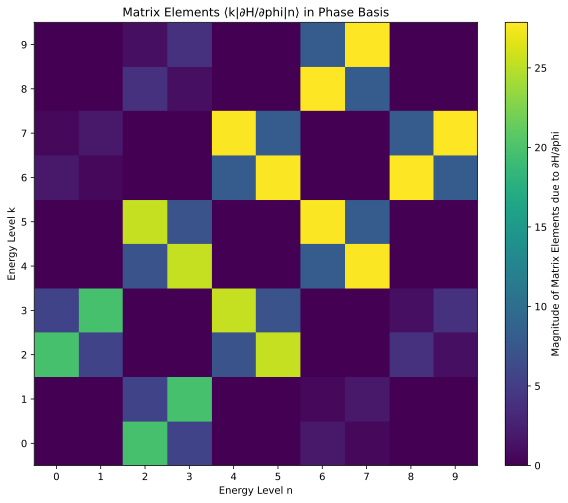

In [10]:
# phase basis

import numpy as np
import matplotlib.pyplot as plt

# Constants and discretization setup
E_C = 1.0  # Charging Energy
E_J = 50  # Josephson Energy
N_phi = 100  # Number of discretization points for phi
N_phi_trunc = 10
phi = np.linspace(0, 2 * np.pi, N_phi, endpoint=False)  # Discretize the phase interval [0, 2*pi]

# Step size for phi
h_phi = 2 * np.pi / N_phi

# Derivative operator using central differences for n
d_dphi = -1j * (np.diag(np.ones(N_phi-1), 1) - np.diag(np.ones(N_phi-1), -1)) / (2 * h_phi)
d_dphi[0, -1] = -1j / (2 * h_phi)  # Periodic boundary condition
d_dphi[-1, 0] = 1j / (2 * h_phi)

# Cosine and Sine matrices for cos(phi) and sin(phi)
cos_phi = np.diag(np.cos(phi))
sin_phi = np.diag(np.sin(phi))

# Hamiltonian matrix
H = 4 * E_C * (d_dphi @ d_dphi) - E_J * cos_phi  # Assuming ng = 0 for simplicity

# Derivative of Hamiltonian with respect to phi
dH_dphi = E_J * sin_phi  # Derivative of -E_J * cos(phi)

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Calculate matrix elements ⟨k|∂H/∂phi|n⟩ in the eigenbasis
matrix_elements_phi = eigenvectors.conj().T @ dH_dphi @ eigenvectors

matrix_elements_phi = matrix_elements_phi[:N_phi_trunc, :N_phi_trunc]

# Plotting the matrix elements for ∂H/∂phi
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(matrix_elements_phi), cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude of Matrix Elements due to ∂H/∂phi')
plt.title('Matrix Elements ⟨k|∂H/∂phi|n⟩ in Phase Basis')
plt.xlabel('Energy Level n')
plt.ylabel('Energy Level k')
plt.xticks(range(N_phi_trunc), labels=[f'{i}' for i in range(N_phi_trunc)])
plt.yticks(range(N_phi_trunc), labels=[f'{i}' for i in range(N_phi_trunc)])
plt.show()


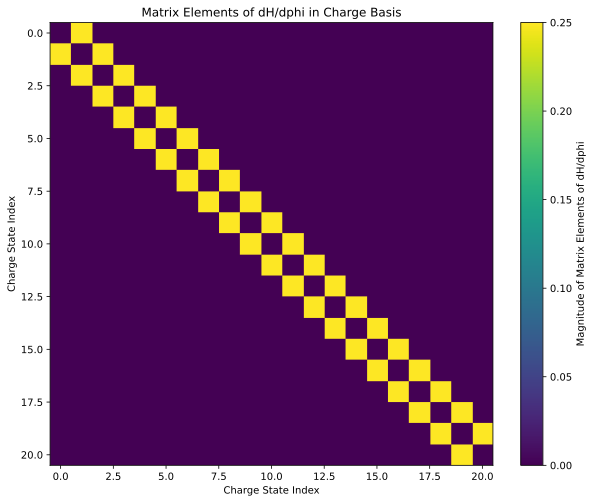

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# CHARGE BASIS

# Constants
E_C = 1.0  # Charging Energy
E_J = 0.5  # Josephson Energy
n_g = -0.1  # Base offset charge value
n_max = 10  # Range of charge states

# Define charge states
charge_states = np.arange(-n_max, n_max + 1)

# Kinetic term using charge operator
n_operator = np.diag(charge_states - n_g)
H_kinetic = 4 * E_C * np.dot(n_operator, n_operator)

# Construct cosine and sine matrices in the charge basis
cos_phi = np.zeros((2 * n_max + 1, 2 * n_max + 1))
sin_phi = np.zeros((2 * n_max + 1, 2 * n_max + 1), dtype=complex)

for n in range(2 * n_max):
    cos_phi[n, n+1] = cos_phi[n+1, n] = 0.5
    sin_phi[n, n+1] = -0.5j
    sin_phi[n+1, n] = 0.5j

# Josephson term and its phi derivative
H_Josephson = -E_J * cos_phi
dH_dphi = -E_J * sin_phi  # Derivative wrt phi

# Total Hamiltonian and its derivative
H = H_kinetic + H_Josephson

# Compute matrix elements in the original charge basis
# For demonstration, we can display the matrix or analyze its properties further
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(dH_dphi), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Magnitude of Matrix Elements of dH/dphi')
plt.title('Matrix Elements of dH/dphi in Charge Basis')
plt.xlabel('Charge State Index')
plt.ylabel('Charge State Index')
plt.show()

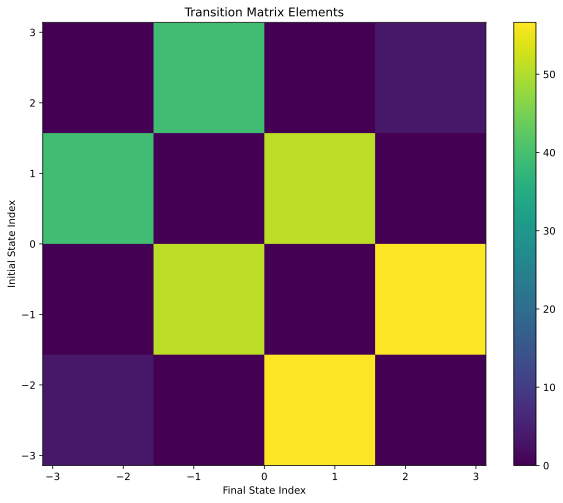

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Simulation parameters
left_phi = -np.pi
right_phi = np.pi
N_phi = 100
phi_list = np.linspace(left_phi, right_phi, N_phi)

# Assume theta_grids and nmon are properly defined earlier in your context
# For each wavefunction index i from 0 to 3 (first four wavefunctions)
transition_matrix = np.zeros((4, 4), dtype=np.complex128)  # Initialize the transition matrix

for i in range(4):  # Iterate over the initial state indices
    for j in range(4):  # Iterate over the final state indices
        # Generate the wavefunction data for the j-th final state
        # Compute the matrix element for the transition i -> j
        transition_matrix[i, j] = np.sum(wavefunctions[i].conj() * np.sin(phi_list) * wavefunctions[j])

# Plotting the matrix of transition elements
plt.figure(figsize=(10, 8))
plt.imshow(np.absolute(transition_matrix), cmap='viridis', interpolation='nearest', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.colorbar()
plt.title('Transition Matrix Elements')
plt.xlabel('Final State Index')
plt.ylabel('Initial State Index')
# plt.xticks(ticks=np.arange(4), labels=[f'{i}' for i in range(4)])
# plt.yticks(ticks=np.arange(4), labels=[f'{i}' for i in range(4)])
plt.show()
